In [ ]:
!pip install torchio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 172 kB 35.8 MB/s 
     |████████████████████████████████| 48.4 MB 26 kB/s 


In [ ]:
!pip install glob2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install unet

In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install torch==1.9.0 torchvision==0.10.0 torchaudio==0.9.0 torchtext==0.10.0
!pip uninstall transformers
!pip install transformers==4.8.0


Found existing installation: transformers 4.8.0
Uninstalling transformers-4.8.0:
  Would remove:
    /usr/local/bin/transformers-cli
    /usr/local/lib/python3.7/dist-packages/transformers-4.8.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/transformers/*
Proceed (y/n)? n


In [ ]:
!pip install glob2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install monai


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 721 kB 5.4 MB/s 


In [ ]:
import torchio as tio 
import torch
import nibabel as nib
import numpy as np
import os
import torchvision
import matplotlib.pyplot as plt
from glob2 import glob
from tqdm import tqdm
import seaborn as sns;sns.set()


In [ ]:
add_noise = tio.RandomNoise(std=0.25)
tensor = torch.ones(1, 2, 2, 2)
tensor2 = torch.randn(1,2,2,2)
transformed2 = (tensor2*0.25)+tensor
transformed = add_noise(tensor)
print('Before transform:')
print(transformed2)
print()
print('After transform:')
print(transformed)

Before transform:
tensor([[[[1.3543, 1.0063],
          [1.0122, 1.8632]],

         [[1.0119, 1.1256],
          [0.8451, 1.5611]]]])

After transform:
tensor([[[[1.0005, 1.0507],
          [0.5563, 0.7011]],

         [[0.9947, 0.9574],
          [1.1007, 1.0645]]]])


In [ ]:
rescale = tio.RescaleIntensity(

    out_min_max=(-1000, 1000), in_min_max=(ct, ct_bone))

In [ ]:
image = tio.ScalarImage(tensor=tensor)
transformed = add_noise(image)
print(transformed)

ScalarImage(shape: (1, 2, 2, 2); spacing: (1.00, 1.00, 1.00); orientation: RAS+; dtype: torch.FloatTensor; memory: 32 Bytes)


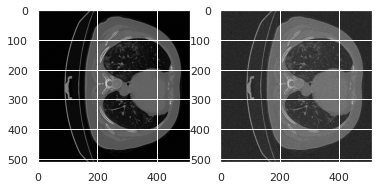

In [ ]:
path = '/content/drive/MyDrive/kaggle_dataset/ct_scans/coronacases_org_001.nii'
image = nib.load(path)
#print(image.shape)
num1 = image.get_fdata()
num = np.resize(num1,[1,512,512,301])
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(num[0,:,:,125],cmap='gray')
#tensor = torch.from_numpy(num)
#image = tio.ScalarImage(tensor=tensor)
transformed = add_noise(num)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(transformed[0,:,:,125],cmap='gray')
#print(transformed[0,:,:,56])

# preprocessing Data

In [ ]:
image_path = '/content/drive/MyDrive/kaggle_dataset/ct_scans/*'
mask_infection_path = '/content/drive/MyDrive/kaggle_dataset/lung_and_infection_mask/*'
#mask_lung_path =  '/content/drive/MyDrive/kaggle_dataset/lunng_new/*'
images_path = sorted(glob(image_path))
masks_infection_path = sorted(glob(mask_infection_path))
#masks_lung_path = sorted(glob(mask_lung_path))
subjects = []
for i,(imagePath,labelPath) in enumerate(zip(images_path,masks_infection_path)):
  #print(masks_lung_path[i])
  subject = tio.Subject(
      chest = tio.ScalarImage(imagePath),
      mask_infection_chest = tio.LabelMap(labelPath),
      #mask_lung = tio.LabelMap(masks_lung_path[i])
  )
  subjects.append(subject)
dataset = tio.SubjectsDataset(subjects)
print('cases',len(dataset))

cases 20


# **Histogram of original images**

In [ ]:
from scipy import stats
def plot_histogram(axis, tensor, num_positions=100, label=None, alpha=0.05, color=None):
    values = tensor.numpy().ravel()
    kernel = stats.gaussian_kde(values)
    positions = np.linspace(values.min(), values.max(), num=num_positions)
    histogram = kernel(positions)
    kwargs = dict(linewidth=1, color='black' if color is None else color, alpha=alpha)
    if label is not None:
        kwargs['label'] = label
    axis.plot(positions, histogram, **kwargs)

  5%|▌         | 1/20 [02:49<53:46, 169.83s/it]/usr/local/lib/python3.7/dist-packages/torchio/data/io.py:39: UserWarning: Error loading image with SimpleITK:
Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK-build/ITK/Modules/IO/NIFTI/src/itkNiftiImageIO.cxx:1980:
ITK ERROR: ITK only supports orthonormal direction cosines.  No orthonormal definition found!

Trying NiBabel...
  warnings.warn(message)
 50%|█████     | 10/20 [24:09<25:48, 154.81s/it]/usr/local/lib/python3.7/dist-packages/torchio/data/io.py:39: UserWarning: Error loading image with SimpleITK:
Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK-build/ITK/Modules/IO/NIFTI/src/itkNiftiImageIO.cxx:1980:
ITK ERROR: ITK only supports orthonormal direction cosines.  No orthonormal definition found!

Trying NiBabel...
  warnings.warn(message)
 55%|█████▌    | 11/20 [24:47<17:50, 118.92s/it]/usr/local/lib/python3.7/dist-packages/torchio/data/io.py:39: UserWarning: Error loading image with Simpl

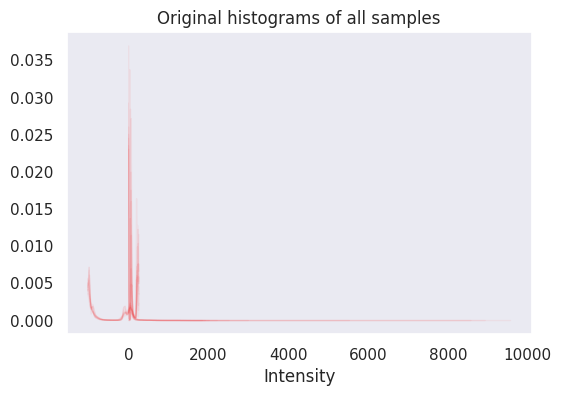

In [ ]:

fig, ax = plt.subplots(dpi=100)
for path in tqdm(images_path):
    tensor = tio.ScalarImage(path).data
    plot_histogram(ax, tensor, color='red')
#ax.set_xlim(-100, 2000)
#ax.set_ylim(0, 0.004);
ax.set_title('Original histograms of all samples')
ax.set_xlabel('Intensity')
ax.grid()


#**Histogram of Equalized images**

100%|██████████| 20/20 [40:30<00:00, 121.51s/it]


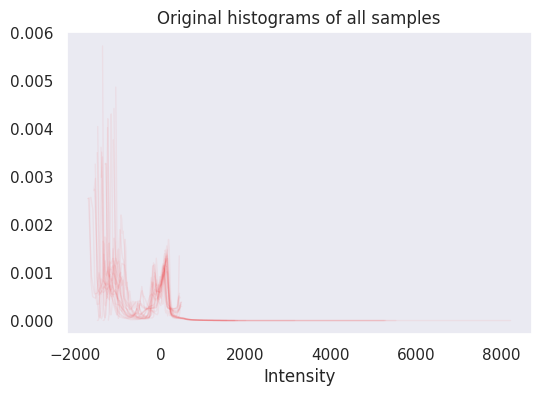

In [ ]:
out_path='/content/drive/MyDrive/out/data2/*'
out_paths = sorted(glob(out_path))
fig, ax = plt.subplots(dpi=100)
for path in tqdm(out_paths):
    tensor = tio.ScalarImage(path).data*256
    plot_histogram(ax, tensor, color='red')
#ax.set_xlim(0,1)
#ax.set_ylim(0, 0.004);
ax.set_title('Original histograms of all samples')
ax.set_xlabel('Intensity')
ax.grid()

In [ ]:
histogram_output_path = '/content/drive/MyDrive/histogram_landmark_path/landmarks.npy'
landmarks = tio.HistogramStandardization.train(
    images_path,
    output_path=histogram_output_path,
)
np.set_printoptions(suppress=False, precision=3)
print('\nTrained landmarks:', landmarks)

  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torchio/data/io.py:39: UserWarning: Error loading image with SimpleITK:
Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK-build/ITK/Modules/IO/NIFTI/src/itkNiftiImageIO.cxx:1980:
ITK ERROR: ITK only supports orthonormal direction cosines.  No orthonormal definition found!

Trying NiBabel...
  warnings.warn(message)



Trained landmarks: [  0.      0.81    1.959   8.951  10.324  15.303  21.847  40.534  67.446
  71.617  76.012  81.48  100.   ]


In [ ]:
landmark_dict = {'chest':landmarks}

In [ ]:
training_transform = tio.Compose(
    [
     tio.RandomNoise(p=1.0,std=40),
     tio.HistogramStandardization({'chest': landmarks},p=1.0),
     tio.ZNormalization(masking_method=tio.ZNormalization.mean,p=1.0),
    ]
)
validation_transform = tio.Compose(
    [
      tio.RandomNoise(p=1.0,std=40),
      tio.HistogramStandardization({'chest': landmarks},p=1.0),
      tio.ZNormalization(masking_method=tio.ZNormalization.mean,p=1.0), 
    ]
)
training_split_ratio=0.8
num_subjects = len(dataset)
num_training_subjects = int(training_split_ratio * num_subjects)
num_validation_subjects = num_subjects - num_training_subjects

num_split_subjects = num_training_subjects, num_validation_subjects
training_subjects, validation_subjects = torch.utils.data.random_split(subjects, num_split_subjects)

training_set = tio.SubjectsDataset(
    training_subjects, transform=training_transform)


In [ ]:
for i in tqdm(range(0,len(training_set))):
  training_set[i].chest.save('/content/drive/MyDrive/kaggle_dataset/ct_2/coronacase_'+str(i)+'.nii.gz')
  training_set[i].mask_infection_chest.save('/content/drive/MyDrive/kaggle_dataset/lung_2/coronacase_mask_'+str(i)+'.nii.gz')
  #training_set[i].mask_lung.save('/content/drive/MyDrive/preprocess_dataset/train_new/lung_mask2/lung_coronacase'+str(i)+'.nii.gz')

  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torchio/data/io.py:39: UserWarning: Error loading image with SimpleITK:
Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK-build/ITK/Modules/IO/NIFTI/src/itkNiftiImageIO.cxx:1980:
ITK ERROR: ITK only supports orthonormal direction cosines.  No orthonormal definition found!

Trying NiBabel...
  warnings.warn(message)
100%|██████████| 20/20 [15:03<00:00, 45.16s/it]


In [ ]:
for i in tqdm(range(0,len(validation_set))):
    validation_set[i].chest.save('/content/drive/MyDrive/preprocess_dataset/valid_new/data/coronacase_'+str(i)+'.nii.gz')
    validation_set[i].mask_infection_chest.save('/content/drive/MyDrive/preprocess_dataset/valid_new/mask/coronacase_mask_'+str(i)+'.nii.gz')
    #validation_set[i].mask_lung.save('/content/drive/MyDrive/preprocess_dataset/valid_new2/lung_mask/lung_coronacase'+str(i)+'.nii.gz')

 50%|█████     | 2/4 [01:21<01:18, 39.19s/it]/usr/local/lib/python3.7/dist-packages/torchio/data/io.py:39: UserWarning: Error loading image with SimpleITK:
Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK-build/ITK/Modules/IO/NIFTI/src/itkNiftiImageIO.cxx:1980:
ITK ERROR: ITK only supports orthonormal direction cosines.  No orthonormal definition found!

Trying NiBabel...
  warnings.warn(message)
100%|██████████| 4/4 [01:41<00:00, 25.38s/it]
